In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import helpers as h

In [2]:
results_np = np.load('results_test_kfolds_aa-unet-nonp-folds.npy')
results_p = np.load('results_test_kfolds_aa-unet-p-folds.npy')
results_c = np.load('results_test_kfolds_model_centers_aa-unet-p-folds.npy')

In [7]:
dscs = [results_np[:, 0], results_p[:, 0], results_c[:, 0]]

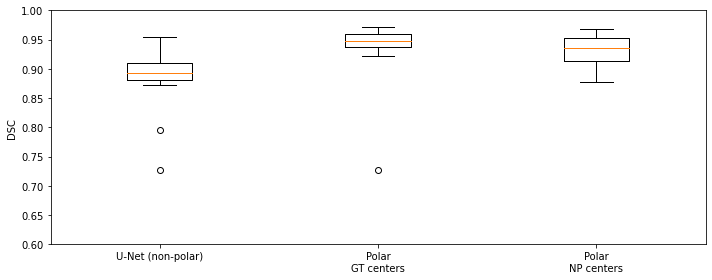

In [32]:
plt.figure(figsize=(6, 4))
plt.boxplot(dscs, showfliers=True)
plt.ylabel('DSC')
plt.ylim(0.6, 1.0)
plt.xticks([1, 2, 3], ['U-Net (non-polar)', 'Polar\nGT centers', 'Polar\nNP centers'])
plt.tight_layout()


In [44]:
sys.path.append('datasets/aa')
from aa_dataset import AortaDataset

dataset = AortaDataset('train', hospital_id='D', polar=True)

None


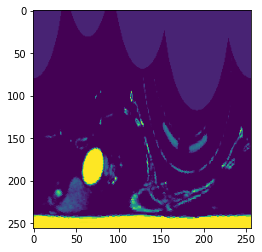

In [56]:
img, label = dataset[130]
plt.imshow(img[0])

In [3]:
input = cv.imread('datasets/polyp/valid/input/594.png')
input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
label = cv.imread('datasets/polyp/valid/label/594.png')

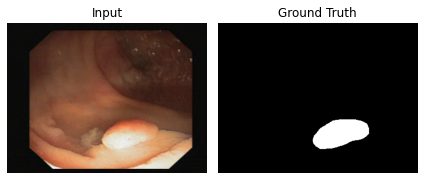

In [4]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(input)
ax1.set_title('Input')
ax1.set_axis_off()
ax2.imshow(label)
ax2.set_axis_off()
ax2.set_title('Ground Truth')
plt.tight_layout()
plt.savefig('plots/polyp_example.png', bbox_inches='tight')

In [5]:
input = np.load('datasets/liver/valid/volume-130-400.npy')
label = np.load('datasets/liver/valid/segmentation-130-400.npy')
label[label > 0] = 1

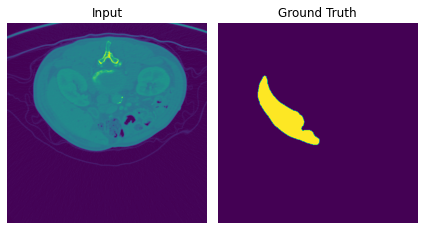

In [6]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(input)
ax1.set_title('Input')
ax1.set_axis_off()
ax2.imshow(label)
ax2.set_axis_off()
ax2.set_title('Ground Truth')
plt.tight_layout()
plt.savefig('plots/liver_example.png', bbox_inches='tight')

In [7]:
input = cv.imread('datasets/lesion/valid/input/ISIC_0036206.jpg')
input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
label = cv.imread('datasets/lesion/valid/label/ISIC_0036206.png')

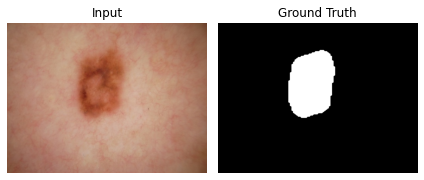

In [8]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(input)
ax1.set_title('Input')
ax1.set_axis_off()
ax2.imshow(label)
ax2.set_axis_off()
ax2.set_title('Ground Truth')
plt.tight_layout()
plt.savefig('plots/lesion_example.png', bbox_inches='tight')

In [29]:
import polar_transformations as pt

center = pt.centroid(label)
label = label[:, :, 0] / 255
label_polar = pt.to_polar(label, center)
input_polar = pt.to_polar(input, center).astype(np.uint8)

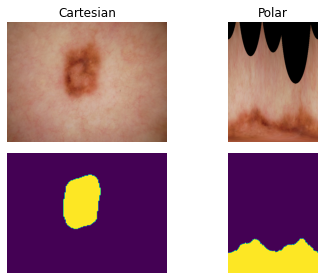

In [31]:
_, axes = plt.subplots(2, 2)
axes = axes.flatten()
images = [input, input_polar, label, label_polar]

axes[0].set_title('Cartesian')
axes[1].set_title('Polar')

for i in range(len(images)):
    ax = axes[i]
    ax.imshow(images[i])
    ax.set_axis_off()
    
plt.tight_layout()
plt.savefig('plots/to-polar.png', bbox_inches='tight')

In [48]:
image = np.zeros((255, 255, 3), np.uint8)
image = cv.circle(image, (255 // 2, 255 // 2), 255 // 4, (0, 0, 255), 2)
image = cv.circle(image, (255 // 2, 255 // 2), 3, (255, 0, 0), -1)
image_polar = pt.to_polar(image, (255 // 2, 255 // 2)).astype(np.uint8)

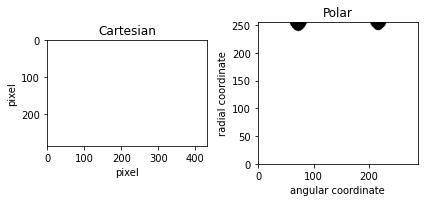

In [121]:
_, axes = plt.subplots(1, 2)
axes = axes.flatten()
images = [image, image_polar]

axes[0].set_title('Cartesian')
axes[1].set_title('Polar')

axes[0].set_ylabel('pixel')
axes[0].set_xlabel('pixel')


axes[1].set_ylabel('radial coordinate')
axes[1].set_xlabel('angular coordinate')
axes[1].set_ylim(0, 255)

axes[0].imshow(images[0])
axes[1].imshow(np.flipud(images[1]), origin='lower')
    
plt.tight_layout()
plt.savefig('plots/polar-transform.png', bbox_inches='tight')

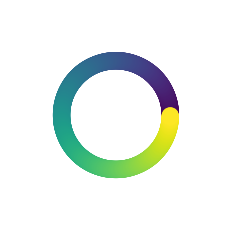

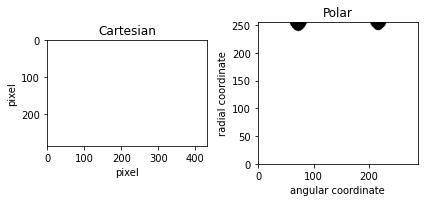

In [120]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

xval = np.arange(0, 2*3.14, 0.01)
yval = np.ones_like(xval)

colormap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(0.0, 2*np.pi)

ax = plt.subplot(1, 1, 1, polar=True)
ax.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax.set_xticks([])
ax.set_yticks([])
ax.margins(0)
ax.axis('off')
fig.tight_layout(pad=0)

fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

image_polar = pt.to_polar(image, (width // 2, height // 2)).astype(np.uint8)

_, axes = plt.subplots(1, 2)
axes = axes.flatten()
images = [image, image_polar]

axes[0].set_title('Cartesian')
axes[1].set_title('Polar')

axes[0].set_ylabel('pixel')
axes[0].set_xlabel('pixel')


axes[1].set_ylabel('radial coordinate')
axes[1].set_xlabel('angular coordinate')
axes[1].set_ylim(0, 255)

axes[0].imshow(images[0])
axes[1].imshow(np.flipud(images[1]), origin='lower')
    
plt.tight_layout()
plt.savefig('plots/polar-transform.png', bbox_inches='tight')

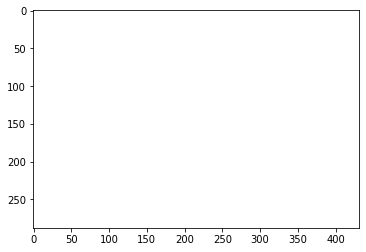

In [115]:
plt.imshow(image)

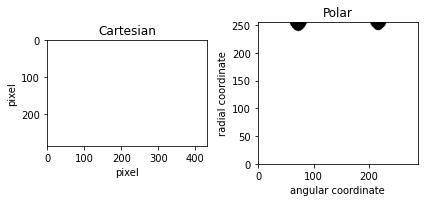

In [112]:
image_polar = pt.to_polar(image, (width // 2, height // 2)).astype(np.uint8)

_, axes = plt.subplots(1, 2)
axes = axes.flatten()
images = [image, image_polar]

axes[0].set_title('Cartesian')
axes[1].set_title('Polar')

axes[0].set_ylabel('pixel')
axes[0].set_xlabel('pixel')


axes[1].set_ylabel('radial coordinate')
axes[1].set_xlabel('angular coordinate')
axes[1].set_ylim(0, 255)

axes[0].imshow(images[0])
axes[1].imshow(np.flipud(images[1]), origin='lower')
    
plt.tight_layout()
plt.savefig('plots/polar-transform.png', bbox_inches='tight')

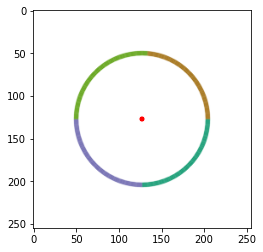

In [183]:
import numpy as np
import cv2
from matplotlib import cm

img = np.ones((255,255,3), np.uint8) * 255

circ_center = (255 // 2, 255 // 2)
circ_radius = 75
circ_thick  = 5

viridis = cm.get_cmap('Dark2')

def draw_arc(img, center, rad, angle, startAngle, endAngle, color, thickness, lineType, thick=1):
    for r in range(rad,rad+thickness):
        cv2.ellipse(img, center, (r,r), angle, startAngle, endAngle, color, thick, lineType)

draw_arc(img, circ_center, circ_radius, 0,  0,  90, np.array(viridis(0)) * 255, circ_thick, cv2.LINE_AA)
draw_arc(img, circ_center, circ_radius, 0, 90, 180, np.array(viridis(0.25)) * 255, circ_thick, cv2.LINE_AA)
draw_arc(img, circ_center, circ_radius, 0, 180, 275, np.array(viridis(0.5)) * 255, circ_thick, cv2.LINE_AA)
draw_arc(img, circ_center, circ_radius, 0, 275, 360, np.array(viridis(0.75)) * 255, circ_thick, cv2.LINE_AA)
img = cv.circle(img, (255 // 2, 255 // 2), 3, (255, 0, 0), -1)

plt.imshow(img)

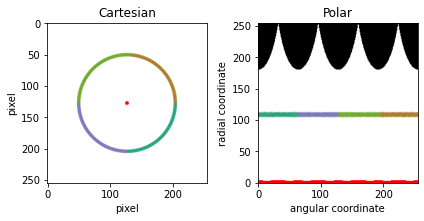

In [185]:
image_polar = pt.to_polar(img, (255 // 2, 255 // 2)).astype(np.uint8)

_, axes = plt.subplots(1, 2)
axes = axes.flatten()
images = [img, image_polar]

axes[0].set_title('Cartesian')
axes[1].set_title('Polar')

axes[0].set_ylabel('pixel')
axes[0].set_xlabel('pixel')


axes[1].set_ylabel('radial coordinate')
axes[1].set_xlabel('angular coordinate')
axes[1].set_ylim(0, 255)

axes[0].imshow(images[0])
axes[1].imshow(np.flipud(images[1]), origin='lower')
    
plt.tight_layout()
plt.savefig('plots/polar-transform.png', bbox_inches='tight')

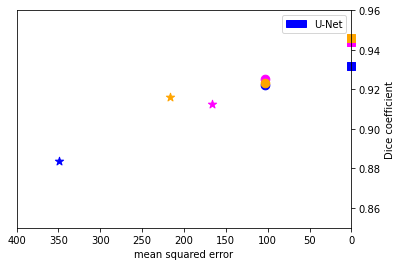

In [52]:
import matplotlib.patches as mpatches

# for lesion
# [unet, resunetpp, deeplab]
mses = [
    [0, 348.7732342007435, 103.21189591078067],
    [0, 166.8624535315985, 103.21189591078067],
    [0, 216.25650557620818, 103.21189591078067],
]
dscs = [
    [0.9320, 0.8836, 0.9224],
    [0.9439, 0.9125, 0.9253],
    [0.9459, 0.9162, 0.9235],
]

colors = ['blue', 'magenta', 'orange']
markers = ['s', '*', 'o']

fig, ax = plt.subplots()
ax.set_xlim(400, 0)
ax.set_ylim(0.85, 0.96)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.set_xlabel('mean squared error')
ax.set_ylabel('Dice coefficient')

for i in range(len(mses)):
    sorting = np.argsort(np.array(mses[i]))
    sorted_mses = np.array(mses[i])[sorting]
    sorted_dscs = np.array(dscs[i])[sorting]
    #ax.plot(sorted_mses, sorted_dscs, c=colors[i])
    for j in range(len(mses[i])):
        ax.scatter(mses[i][j], dscs[i][j], c=colors[i], marker=markers[j], s=75, clip_on=False,)

#red_patch = mpatches.Patch(color='blue', label='U-Net')
#ax.legend(handles=[red_patch])

plt.show()

In [59]:
import os

liver_polar = 'liver_unet_polar_aug'
liver = 'liver_unet_non_polar'
polyp_polar = 'polyp_unet_polar_aug'
polyp = 'polyp_unet_non_polar'
eat_polar = 'eat_unet_polar_aug'
eat = 'eat_unet_non_polar'
lesion_polar = 'lesion_unet_polar_aug'
lesion = 'lesion_unet_non_polar'

runs = [polyp, lesion, liver, eat]
runs_polar = [polyp_polar, lesion_polar, liver_polar, eat_polar]

runs = [{
    'train': os.path.join('runs', f'run-{name}-tag-training_dsc.csv'),
    'valid': os.path.join('runs', f'run-{name}-tag-validation_dsc.csv')
    } for name in runs]
runs_polar = [{
    'train': os.path.join('runs', f'run-{name}-tag-training_dsc.csv'),
    'valid': os.path.join('runs', f'run-{name}-tag-validation_dsc.csv')
    } for name in runs_polar]

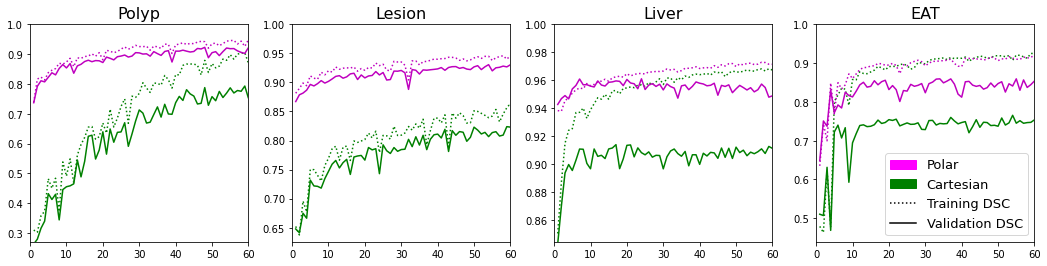

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

fix, axes = plt.subplots(1, len(runs), figsize=(18,4))
axes = axes.flatten()
titles = ['Polyp', 'Lesion', 'Liver', 'EAT']

for i in range(len(runs)):
    run = runs[i]
    run_polar = runs_polar[i]
    ax = axes[i]
    
    ax.set_title(titles[i], fontsize=16)
    files = [run['train'], run['valid'], run_polar['train'], run_polar['valid']]
    args = ['g:', 'g', 'm:', 'm']

    for (file, arg, title) in zip(files, args, titles):
        data = pd.read_csv(file)
        ax.plot(data['Step'], data['Value'], arg)
        ax.set_xlim(0, 60)
        ax.set_ylim(top=1)


cart_patch = mpatches.Patch(color='green', label='Cartesian')
polar_patch = mpatches.Patch(color='magenta', label='Polar')


train_line = mlines.Line2D([], [], linestyle=':', c='black', label='Training DSC')
valid_line = mlines.Line2D([], [], c='black', label='Validation DSC')

plt.legend(handles=[polar_patch, cart_patch, train_line, valid_line], prop={'size': 13})
plt.savefig('plots/training-graphs.png', bbox_inches='tight')